# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/circuit.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/circuit_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3109229974570883
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.9721319514145392
              precision    recall  f1-score   support

           1       0.52      0.93      0.67       252
           2       0.61      0.69      0.65       252
           3       0.41      0.45      0.43       252
           4       0.32      0.38      0.35       252
           5       0.30      0.40      0.34       252
           6       0.29      0.42      0.35       252
           7       0.22      0.37      0.28       252
           8       0.29      0.30      0.30       252
           9       0.25      0.23      0.24       252
          10       0.20      0.24      0.22       252
          11       0.25      0.31      0.27       252
          12       0.23      0.29      0.26       252
          13       0.24      0.22      0.23       252
          14 

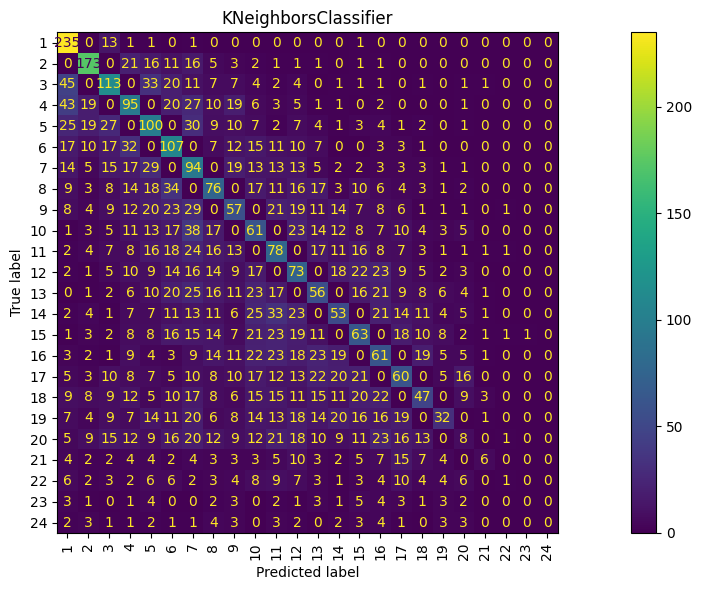

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.2672281233076687
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.496438442873133
              precision    recall  f1-score   support

           1       0.50      0.84      0.62       252
           2       0.48      0.67      0.56       252
           3       0.30      0.40      0.34       252
           4       0.33      0.35      0.34       252
           5       0.20      0.27      0.23       252
           6       0.21      0.38      0.27       252
           7       0.22      0.30      0.26       252
           8       0.24      0.25      0.24       252
           9       0.21      0.24      0.23       252
          10       0.19      0.23      0.21       252
          11       0.19      0.24      0.21       252
          12       0.17      0.18      0.17       252
          13       0.21      0.21      0.21       252
          14  

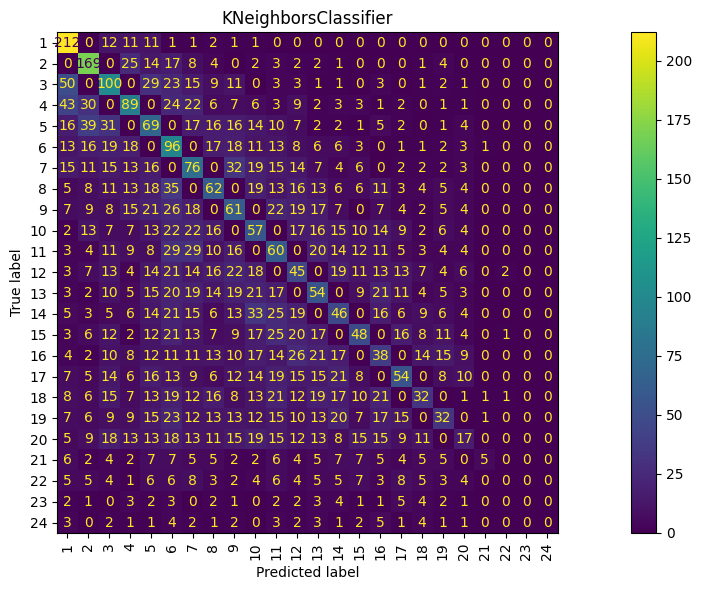

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35411957571048486
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.552286872553367
              precision    recall  f1-score   support

           1       0.70      0.86      0.77       252
           2       0.65      0.77      0.71       252
           3       0.46      0.63      0.54       252
           4       0.42      0.56      0.48       252
           5       0.38      0.38      0.38       252
           6       0.46      0.40      0.43       252
           7       0.23      0.35      0.28       252
           8       0.36      0.35      0.35       252
           9       0.18      0.28      0.22       252
          10       0.46      0.30      0.36       252
          11       0.21      0.30      0.25       252
          12       0.20      0.35      0.25       252
          13       0.34      0.20      0.25       252
          14       0.57      0.31 

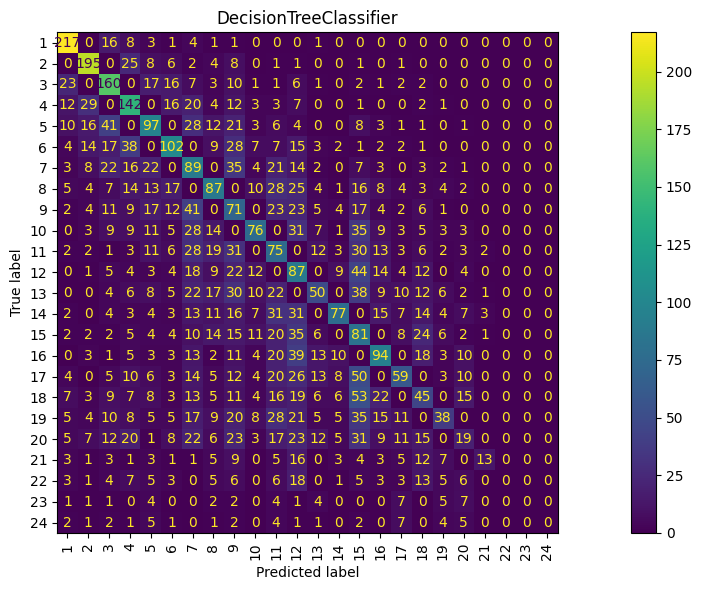

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3381745779473052
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.6361174072300906
              precision    recall  f1-score   support

           1       0.69      0.83      0.75       252
           2       0.58      0.71      0.64       252
           3       0.52      0.60      0.56       252
           4       0.38      0.52      0.44       252
           5       0.36      0.38      0.37       252
           6       0.41      0.41      0.41       252
           7       0.22      0.37      0.28       252
           8       0.37      0.29      0.33       252
           9       0.21      0.26      0.23       252
          10       0.31      0.27      0.29       252
          11       0.23      0.38      0.29       252
          12       0.17      0.38      0.23       252
          13       0.48      0.24      0.32       252
          14       0.31      0.26 

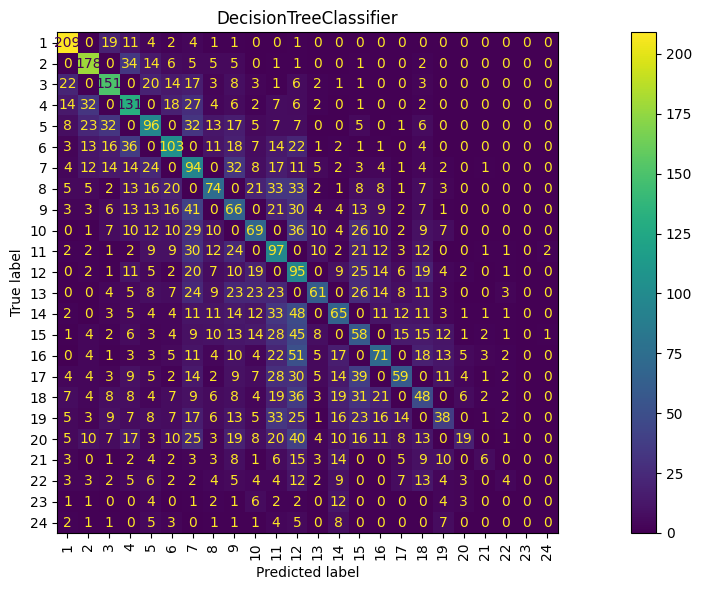

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3550103158625885
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5890314258878098
              precision    recall  f1-score   support

           1       0.60      0.94      0.73       252
           2       0.60      0.79      0.68       252
           3       0.52      0.65      0.58       252
           4       0.38      0.54      0.45       252
           5       0.44      0.43      0.43       252
           6       0.31      0.42      0.36       252
           7       0.29      0.35      0.32       252
           8       0.42      0.27      0.33       252
           9       0.21      0.21      0.21       252
          10       0.39      0.27      0.32       252
          11       0.26      0.29      0.28       252
          12       0.19      0.33      0.24       252
          13       0.39      0.36      0.37       252
          14    

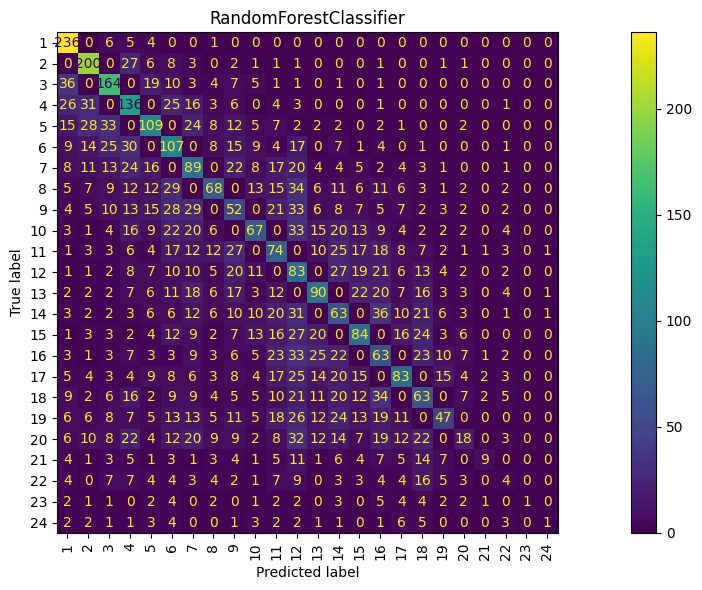

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3467162740458195
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.610252001225232
              precision    recall  f1-score   support

           1       0.55      0.93      0.69       252
           2       0.61      0.82      0.70       252
           3       0.46      0.62      0.53       252
           4       0.38      0.52      0.44       252
           5       0.40      0.40      0.40       252
           6       0.29      0.42      0.35       252
           7       0.29      0.34      0.31       252
           8       0.35      0.25      0.29       252
           9       0.26      0.23      0.24       252
          10       0.25      0.24      0.24       252
          11       0.27      0.29      0.28       252
          12       0.22      0.36      0.27       252
          13       0.25      0.28      0.26       252
          14     

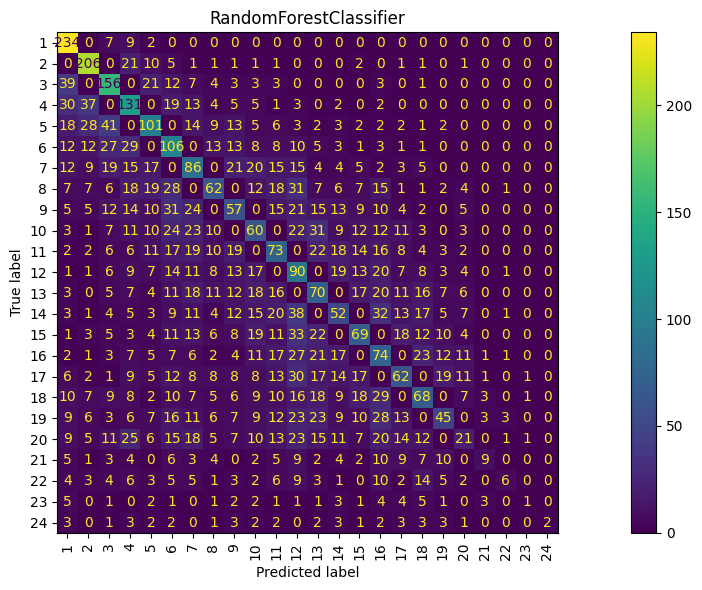

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.36543796060841527
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.4257816473686016
              precision    recall  f1-score   support

           1       0.61      0.95      0.74       252
           2       0.62      0.78      0.69       252
           3       0.56      0.56      0.56       252
           4       0.49      0.52      0.50       252
           5       0.35      0.48      0.40       252
           6       0.32      0.46      0.38       252
           7       0.31      0.33      0.32       252
           8       0.45      0.28      0.35       252
           9       0.22      0.28      0.24       252
          10       0.35      0.36      0.36       252
          11       0.18      0.32      0.23       252
          12       0.29      0.32      0.30       252
          13       0.33      0.25      0.28       252

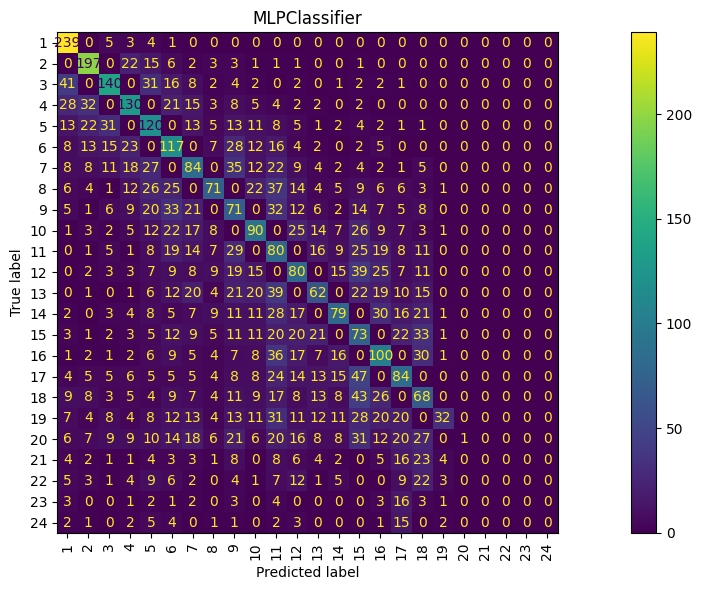

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3636307568693932
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.4198792101066045
              precision    recall  f1-score   support

           1       0.63      0.93      0.75       252
           2       0.61      0.79      0.69       252
           3       0.55      0.53      0.54       252
           4       0.44      0.51      0.47       252
           5       0.36      0.49      0.41       252
           6       0.29      0.47      0.36       252
           7       0.31      0.40      0.35       252
           8       0.33      0.28      0.30       252
           9       0.24      0.22      0.23       252
          10       0.49      0.30      0.37       252
          11       0.17      0.29      0.21       252
          12       0.31      0.40      0.35       252
          13       0.26      0.30      0.28       252


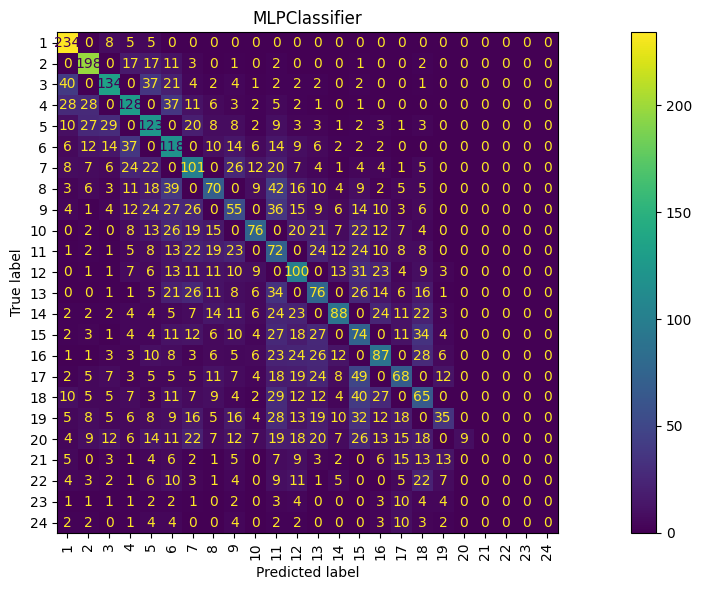

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model, except in knn since it is a model that is highly dependent on dimensionality (the others may discriminate attributes or give them less importance). Attribute selection could be done to improve knn, but the only significant improvement would be in this one, and it probably won't outperform the others.
